In [175]:
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)

## Đọc file dữ liệu

In [176]:
dataset = pd.read_csv("./Unicorn_Companies.csv")

In [177]:
dataset.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


### Số record

In [178]:
len(dataset)

1037

### Các cột của dataset

In [179]:
list(dataset)

['Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City',
 'Industry',
 'Select Inverstors',
 'Founded Year',
 'Total Raised',
 'Financial Stage',
 'Investors Count',
 'Deal Terms',
 'Portfolio Exits']

## Làm sạch dữ liệu

### Làm sạch các dữ liệu None

In [180]:
dataset["Deal Terms"] = dataset["Deal Terms"].replace("None", 0)
dataset['Portfolio Exits'] = dataset['Portfolio Exits'].replace("None", 0)

### Format lại định dạng tiền

In [181]:
def format_total_raised(t_r):
    """
    Hàm format lại Total_Raised về dạng Billion
    t_r : tổng giá trị tăng trưởng ở dạng $xB hoặc $xM
    """
    if t_r == "None":
        return 0
    num = t_r[1:-1]
    post = t_r[-1]
    if post == "B":
        return float(num)
    else:
        return float(num)/1000

In [182]:
# Loại bỏ kí tự $B ở cột giá trị công ty
dataset["Valuation ($B)"] = dataset["Valuation ($B)"].apply(lambda v:float(v[1:]))
# Tạo cột mới, loại bỏ kì tự $B và chuyển lại giá trị về Billion ở cột Tổng tăng trưởng
dataset["Total Raised ($B)"] = dataset["Total Raised"].apply(lambda r:format_total_raised(r))

## Phương pháp lấy mẫu Bootstrap

In [220]:
def Bootstrap_Statistic(n,M,x):
    """
    n : kích thước mẫu
    M : số lần lấy mẫu bootstrap
    x : khoảng tin cậy
    """
    # Mảng 2 chiều chứa M mẫu kích thước n
    sample = np.array([np.zeros(n)]*M)
    # Mảng chứa M giá trị trung bình
    sample_mean = np.zeros(M)
    for i in range(M):
        # Chọn ra ngẫu nhiên n mẫu
        sample[i] = choice(dataset["Valuation ($B)"], size=n)
        sample_mean[i] = np.mean(sample[i])

    # print(sample.shape, sample)
    # print(sample_mean.shape, sample_mean)

    # Đồ thị histogram
    sns.histplot(data=sample_mean, kde=True)

    # Mức ý nghĩa
    alpha = (100-x)/2
    # 2 biên khoảng tin cậy
    # Sắp xếp sample_mean tăng dần rồi cắt đi 2 đầu
    sample_mean_asc = np.sort(sample_mean)
    lower_bound = sample_mean_asc[int(alpha/100*M)]
    upper_bound = sample_mean_asc[int((1-alpha/100)*M)]

    # Sử dụng hàm Numpy Percentile
    # lower_bound = np.percentile(sample_mean, alpha)
    # upper_bound = np.percentile(sample_mean, 100-alpha)

    print(">> Khoang tin cay : ",lower_bound," - ",upper_bound)
    plt.axvline(lower_bound, color="red", linewidth=2)
    plt.axvline(upper_bound, color="red", linewidth=2)

>> Khoang tin cay :  2.6598  -  4.28775


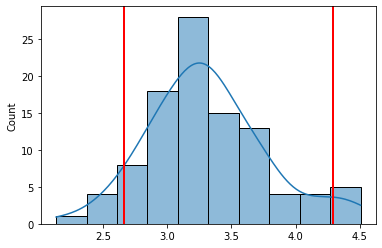

In [221]:
Bootstrap_Statistic(200, 100, 90)